# Customer segmentation

* In this project, by using Annual Income and Spending score, we will segment customers into different groups
* Such segmentation can be used by companies/retailers/banks to better target their offers and subsequently, increase their sales

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* No null values

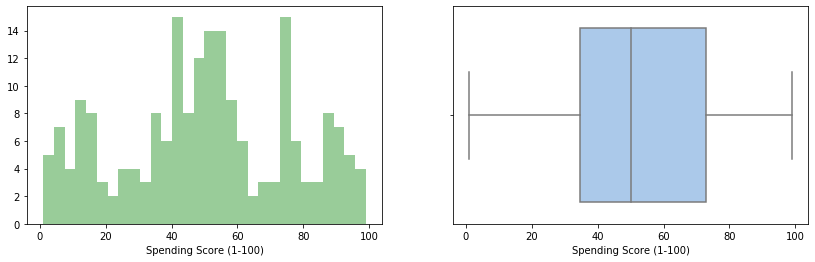

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['Spending Score (1-100)'],kde=False,bins=30, color='g')

plt.subplot(1,2,2)
sns.boxplot(x='Spending Score (1-100)',data=df,palette='pastel')

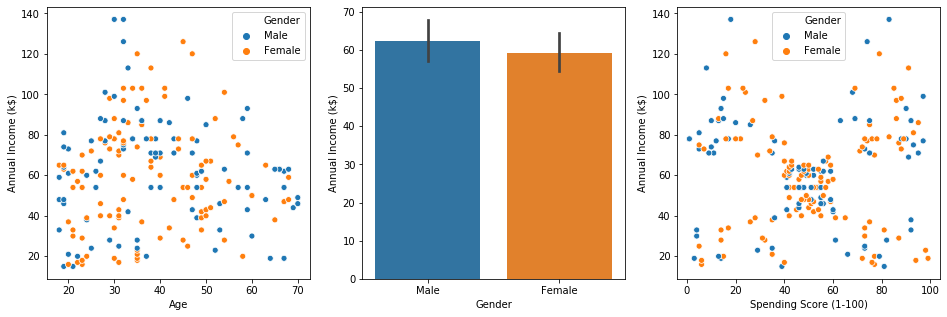

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df,hue='Gender')

plt.subplot(1,3,2)
sns.barplot(x='Gender',y='Annual Income (k$)', data=df)

plt.subplot(1,3,3)
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender')

In [28]:
print('Average annual income for males : ',df[df['Gender']=='Male']['Annual Income (k$)'].mean())
print('Average annual income for females : ',df[df['Gender']=='Female']['Annual Income (k$)'].mean())

Average annual income for males :  62.22727272727273
Average annual income for females :  59.25


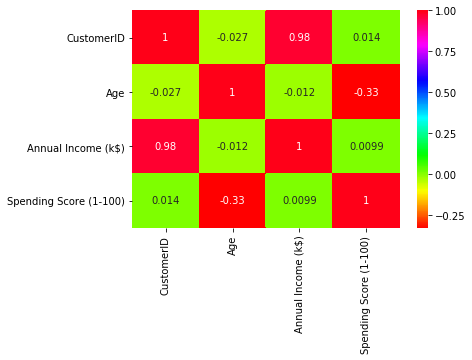

In [29]:
sns.heatmap(df.corr(),annot=True,cmap='hsv')

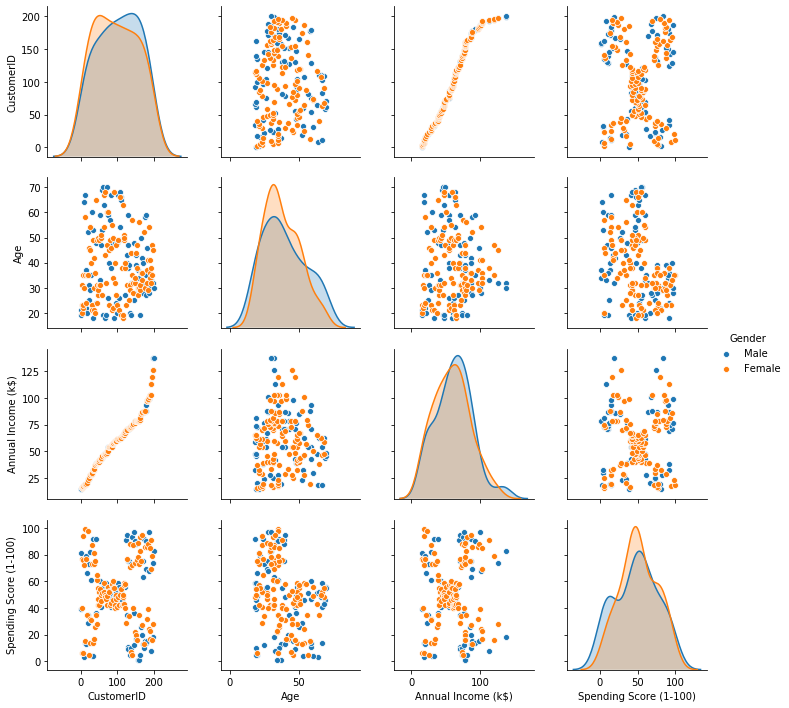

In [30]:
sns.pairplot(data=df,hue='Gender')

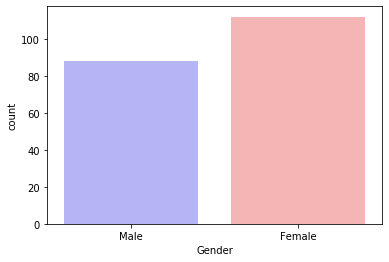

In [32]:
sns.countplot(x='Gender',data=df,palette='bwr')

In [39]:
import scipy.cluster.hierarchy as sch

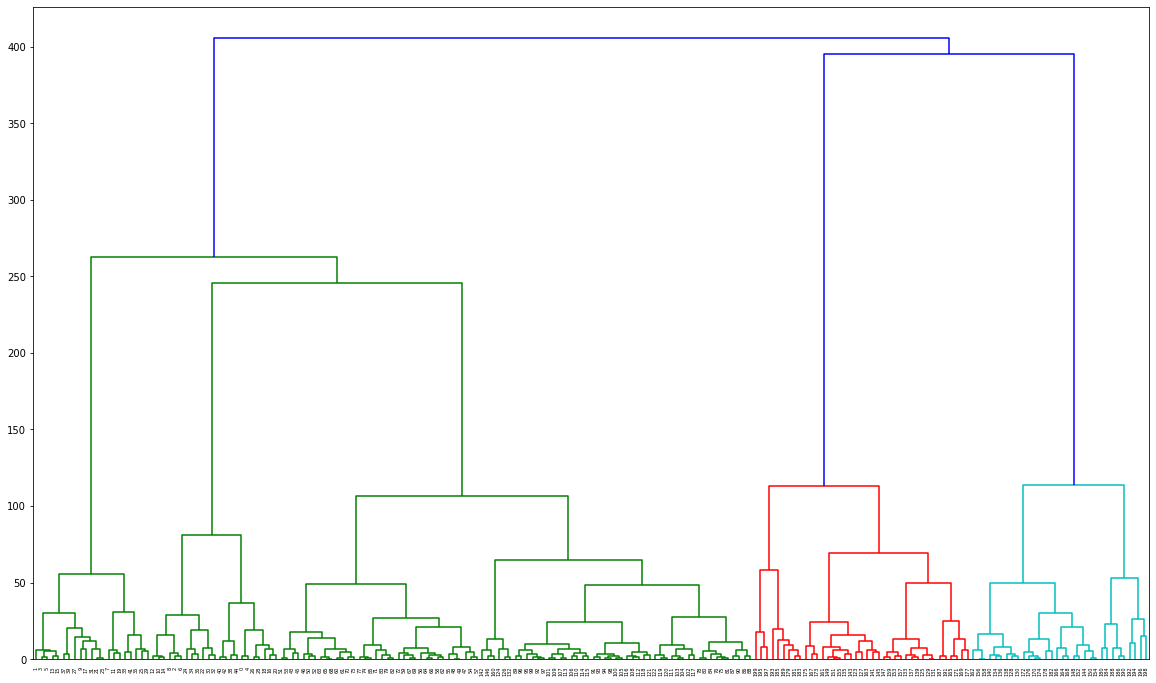

In [42]:
plt.figure(figsize=(20,12))
X=df.iloc[:,3:].values
d=sch.dendrogram(sch.linkage(X,method='ward'))

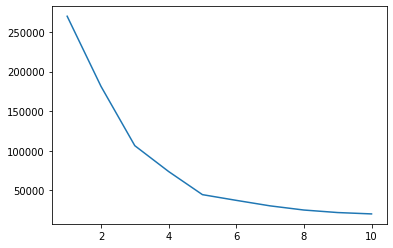

In [44]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.show()

In [45]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(X)

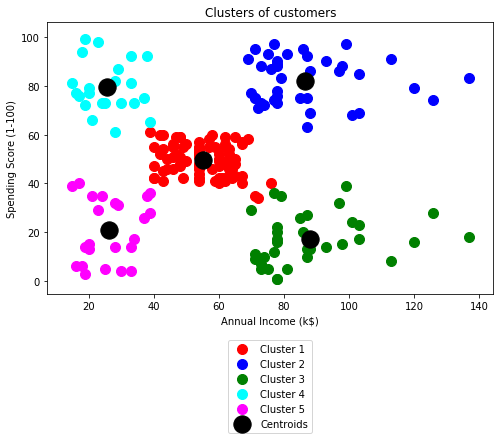

In [57]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(0, -0.15, 1,0), loc=9)
plt.show()

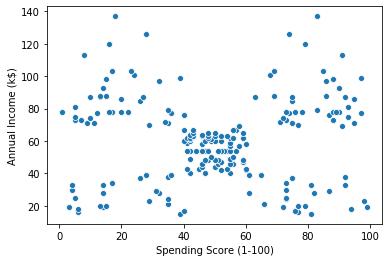

In [58]:
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)')